# Email Spam Classifier using SpamAssassin Public Corpus

## Introduction
Email serves as a vital channel for communication in both our personal and professional lives. While spam emails are an ever-present concern, the main focus of this project shifts towards my keen interest in diving deep into the realm of supervised machine learning. This project serves as a stepping stone, offering a practical, hands-on approach to understanding the intricacies involved in supervised learning algorithms. By constructing an automated system that sorts emails as either 'spam' or 'ham' (non-spam), I aim to explore, learn, and share insights on how to effectively use machine learning to solve real-world problems.

## Objectives
- To explore and understand the SpamAssassin Public Corpus, a collection of emails labeled as 'spam' or 'ham'.
- To perform data pre-processing and feature extraction to prepare the data for machine learning algorithms.
- To train, test, and validate various machine learning models in order to select the most accurate classifier.

## Data Source
The dataset anchoring this project is derived from the SpamAssassin Public Corpus—a trustworthy repository of emails that have been hand-labeled as either 'spam' or 'ham'. This makes it an ideal dataset for this educational journey into supervised machine learning.

## Tools and Libraries
We will be using Python and various libraries such as pandas for data manipulation, scikit-learn for machine learning, and matplotlib for data visualization.



## Imports

In [19]:
from utils.metrics import class_metrics
from utils.pre_processing import *

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from tqdm import tqdm

## Load Dataset

In [2]:
df = pd.read_feather('spamassassin_parsed.csv')
df['date'] = pd.to_datetime(df['date'])

In [3]:
df_unique = df[~df['email'].duplicated()]

ham = df_unique.query('is_spam == 0')
spam = df_unique.query('is_spam == 1')

p_ham = round(len(ham)/len(df_unique)*100, 1)
p_spam = round(len(spam)/len(df_unique)*100, 1)

print(f'# Unique emails: {len(df_unique)}')
print(f'# ham:  {p_ham}%')
print(f'# spam: {p_spam}%')

# Unique emails: 11878
# ham:  79.5%
# spam: 20.5%


# Trainning model

In [4]:
def split_data(model_vec, ham_string, spam_string):
    X = ham_string + spam_string
    y = [0]*len(ham_string) + [1]*len(spam_string)
    
    X = model_vec.fit_transform(X)
    
    return train_test_split(X, y, test_size=0.3, random_state=99)

In [5]:
def score_cross_val(model_vec, model, ham_string, spam_string):
    X_train, X_test, y_train, y_test = split_data(model_vec, ham_string, spam_string)
    cv = KFold(n_splits=5, shuffle=True, random_state=99)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1', verbose=1, n_jobs=-2)
    
    return scores.mean(), scores.std()

In [6]:
def train_model(model_vec, model_classifier, ham_string, spam_string):
    X_train, X_test, y_train, y_test = split_data(model_vec, ham_string, spam_string)
    print(f'Len train: {len(y_train)} | Len test: {len(y_test)}')
    
    model_classifier.fit(X_train, y_train)
    y_pred = model_classifier.predict(X_test)
    
    return y_test, y_pred, model_classifier

In [7]:
ham_total_str = list(ham['email_parsed'])
spam_total_str = list(spam['email_parsed'])

In [8]:
model_vec = CountVectorizer()

## MLPCLassifier

Len train: 8314 | Len test: 3564
Confusion Matrix:
Accuracy: 99.1
Precision: 98.2
Recall: 97.4
F1-score: 97.8


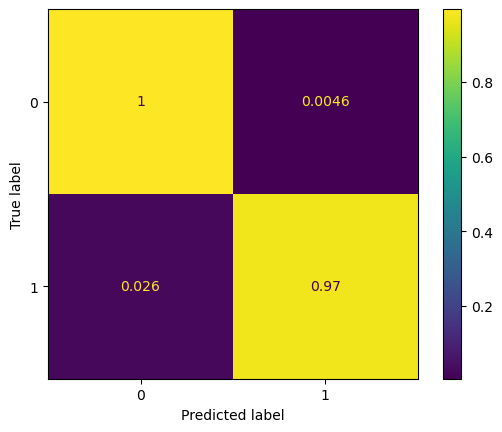

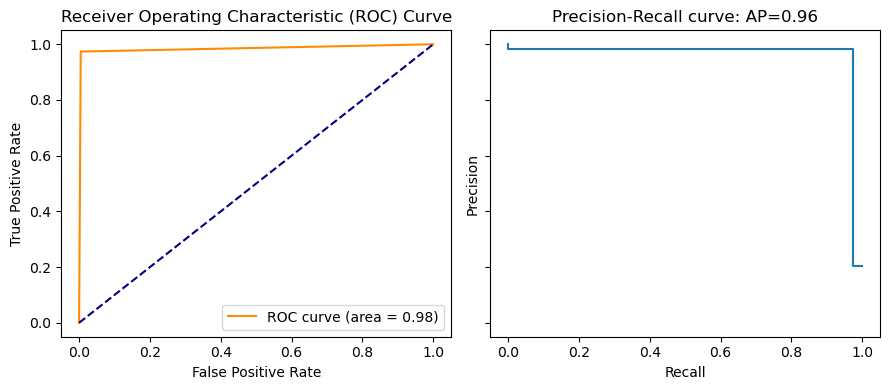

Matthews Correlation Coefficient: 0.9723


In [9]:
y_test, y_pred, model = train_model(model_vec,
                                    MLPClassifier((100,100), random_state=99),
                                    ham_total_str, spam_total_str)
class_metrics(y_test, y_pred, model)

## Using RandomForestClassifier

Len train: 8314 | Len test: 3564
Confusion Matrix:
Accuracy: 98.8
Precision: 99.4
Recall: 94.8
F1-score: 97.0


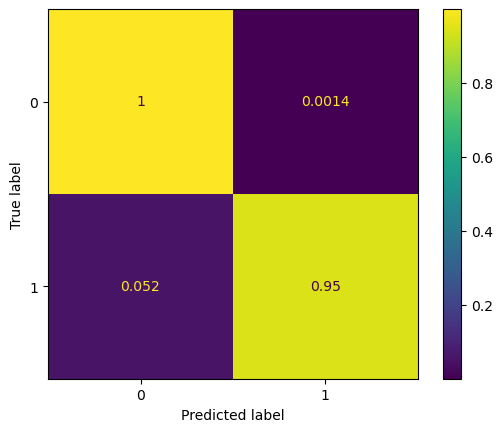

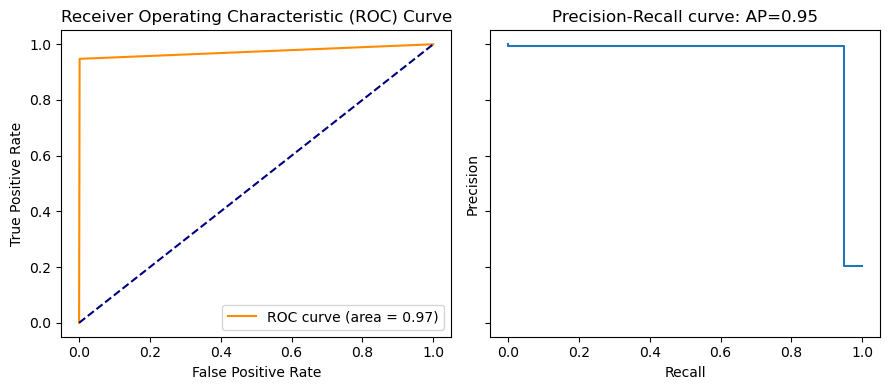

Matthews Correlation Coefficient: 0.9635


In [42]:
y_test, y_pred, model = train_model(model_vec,
                                    RandomForestClassifier(n_estimators=200,
                                                           criterion='entropy',
                                                           bootstrap=False,
                                                           random_state=99),
                                    ham_total_str, spam_total_str)
class_metrics(y_test, y_pred, model)